#  Project Title: Determine If A Passenger Survived During A Sinking Of Titanic     Or Not


# Team Member
 Anirban Kar Chaudhuri

## Project Definition

### Goals

It is your job to predict if a passenger survived the sinking of the Titanic or not. 
For each PassengerId in the test set, you must predict a 0 or 1 value for the Survived variable.


### Dataset
- https://www.kaggle.com/c/titanic
- Target variable, survived is a binary variable stating if a passenger survived or not. 1-survived, 0-deceased. 
- The other featured variables are: PassengerId, Survived, Pclass ,Sex, Age, SibSp, Parch
  Fare, Cabin, Embarked
  
### Tasks
1. Load Test & Train Data

2. Data Engineering

3. Feature Selection

4. Modelling A Voting Classifier Consisting Comprising Of:
   Decision Tree, Logistic Regression, Adaboost, Gradient Boost, Random Forest
   
5. Evaluate Voting Classifier

6. Predict Survival Rate Using Voting Classifier

7. Model & Implement A Neural Network

8. Evaluate Neural Network

9. Predict Survival Rate Using Neural Network

10. Conclusions

## 1. Load Test & Train Data

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

# read train 
train = pd.read_csv("train.csv")
print(train.shape)
train.head()
train

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [2]:
IDtrain = train["PassengerId"]
IDtrain

0        1
1        2
2        3
3        4
4        5
5        6
6        7
7        8
8        9
9       10
10      11
11      12
12      13
13      14
14      15
15      16
16      17
17      18
18      19
19      20
20      21
21      22
22      23
23      24
24      25
25      26
26      27
27      28
28      29
29      30
      ... 
861    862
862    863
863    864
864    865
865    866
866    867
867    868
868    869
869    870
870    871
871    872
872    873
873    874
874    875
875    876
876    877
877    878
878    879
879    880
880    881
881    882
882    883
883    884
884    885
885    886
886    887
887    888
888    889
889    890
890    891
Name: PassengerId, Length: 891, dtype: int64

In [3]:
# read test 
test= pd.read_csv("test.csv")
print(test.shape)
IDtest = test["PassengerId"]
test.head()

(418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
Name=test["Name"]
Name

0                                       Kelly, Mr. James
1                       Wilkes, Mrs. James (Ellen Needs)
2                              Myles, Mr. Thomas Francis
3                                       Wirz, Mr. Albert
4           Hirvonen, Mrs. Alexander (Helga E Lindqvist)
5                             Svensson, Mr. Johan Cervin
6                                   Connolly, Miss. Kate
7                           Caldwell, Mr. Albert Francis
8              Abrahim, Mrs. Joseph (Sophie Halaut Easu)
9                                Davies, Mr. John Samuel
10                                      Ilieff, Mr. Ylio
11                            Jones, Mr. Charles Cresson
12         Snyder, Mrs. John Pillsbury (Nelle Stevenson)
13                                  Howard, Mr. Benjamin
14     Chaffee, Mrs. Herbert Fuller (Carrie Constance...
15         del Carlo, Mrs. Sebastiano (Argenia Genovesi)
16                                     Keane, Mr. Daniel
17                             

## 2. Data Engineering

* Drop Missing values
* Fill up missing values 
* Label Encoding 
* Data exploration using heatmap

In [5]:
train_len = len(train)
dataset =  pd.concat(objs=[train, test], axis=0).reset_index(drop=True)
dataset

C:\Users\Anirban\Anaconda3\envs\mldds\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0.0,17463
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,349909
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1.0,347742
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1.0,237736


In [6]:
# Fill empty and NaNs values with NaN
dataset = dataset.fillna(np.nan)

# Check for Null values
dataset.isnull().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

In [7]:
#Fill in missing fare value
dataset["Fare"] = dataset["Fare"].fillna(dataset["Fare"].median())

In [8]:
#Fill Embarked nan values of dataset set with 'S' most frequent value
dataset["Embarked"] = dataset["Embarked"].fillna("S")

In [9]:
# Filling missing value of Age 

## Fill Age with the median age of similar rows according to Pclass, Parch and SibSp
# Index of NaN age rows
index_NaN_age = list(dataset["Age"][dataset["Age"].isnull()].index)

for i in index_NaN_age :
    age_med = dataset["Age"].median()
    age_pred = dataset["Age"][((dataset['SibSp'] == dataset.iloc[i]["SibSp"]) & (dataset['Parch'] == dataset.iloc[i]["Parch"]) & (dataset['Pclass'] == dataset.iloc[i]["Pclass"]))].median()
    if not np.isnan(age_pred) :
        dataset['Age'].iloc[i] = age_pred
    else :
        dataset['Age'].iloc[i] = age_med

C:\Users\Anirban\Anaconda3\envs\mldds\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Anirban\Anaconda3\envs\mldds\lib\site-packages\numpy\lib\nanfunctions.py:1019: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [10]:
# Drop useless variables 
dataset.drop(labels = ["PassengerId", "Name", "Ticket", "Cabin"], axis = 1, inplace = True)
dataset

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived
0,22.0,S,7.2500,0,3,male,1,0.0
1,38.0,C,71.2833,0,1,female,1,1.0
2,26.0,S,7.9250,0,3,female,0,1.0
3,35.0,S,53.1000,0,1,female,1,1.0
4,35.0,S,8.0500,0,3,male,0,0.0
5,25.0,Q,8.4583,0,3,male,0,0.0
6,54.0,S,51.8625,0,1,male,0,0.0
7,2.0,S,21.0750,1,3,male,3,0.0
8,27.0,S,11.1333,2,3,female,0,1.0
9,14.0,C,30.0708,0,2,female,1,1.0


In [11]:
dataset["Sex"] = dataset["Sex"].map({"male": 0, "female":1})
dataset["Embarked"] = dataset["Embarked"].map({"C": 0, "Q":1, "S":2})
dataset

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived
0,22.0,2,7.2500,0,3,0,1,0.0
1,38.0,0,71.2833,0,1,1,1,1.0
2,26.0,2,7.9250,0,3,1,0,1.0
3,35.0,2,53.1000,0,1,1,1,1.0
4,35.0,2,8.0500,0,3,0,0,0.0
5,25.0,1,8.4583,0,3,0,0,0.0
6,54.0,2,51.8625,0,1,0,0,0.0
7,2.0,2,21.0750,1,3,0,3,0.0
8,27.0,2,11.1333,2,3,1,0,1.0
9,14.0,0,30.0708,0,2,1,1,1.0


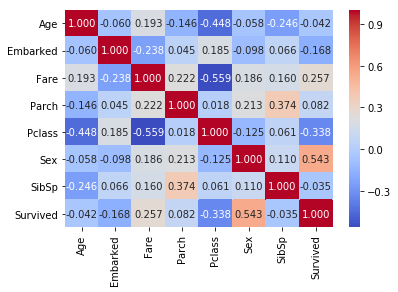

In [12]:
g = sns.heatmap(dataset.corr(),annot=True, fmt = ".3f", cmap = "coolwarm")

## 3. Feature Engineering

* Select target and feature variables
* scaling variables

In [13]:
train = dataset[:train_len]
test = dataset[train_len:]
test.drop(labels=["Survived"],axis = 1,inplace=True)

## Separate train features and label 
train["Survived"] = train["Survived"].astype(int)
Y_train = train["Survived"]
X_train = train.drop(labels = ["Survived"],axis = 1)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Z_train = scaler.fit_transform(X_train)
Test=scaler.fit_transform(test)

C:\Users\Anirban\Anaconda3\envs\mldds\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
C:\Users\Anirban\Anaconda3\envs\mldds\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Anirban\Anaconda3\envs\mldds\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Anirban\Anaconda3\envs\mldds\lib\site-packages\sklearn\base.py:462: DataConversionWarning:

In [14]:
Y_train

0      0
1      1
2      1
3      1
4      0
5      0
6      0
7      0
8      1
9      1
10     1
11     1
12     0
13     0
14     0
15     1
16     0
17     1
18     0
19     1
20     0
21     1
22     1
23     1
24     0
25     1
26     0
27     0
28     1
29     0
      ..
861    0
862    1
863    0
864    0
865    1
866    1
867    0
868    0
869    1
870    0
871    1
872    0
873    0
874    1
875    1
876    0
877    0
878    0
879    1
880    1
881    0
882    0
883    0
884    0
885    0
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int32

In [15]:
Z_train

array([[-0.52673454,  0.58595414, -0.50244517, ...,  0.82737724,
        -0.73769513,  0.43279337],
       [ 0.66648408, -1.9423032 ,  0.78684529, ..., -1.56610693,
         1.35557354,  0.43279337],
       [-0.22842989,  0.58595414, -0.48885426, ...,  0.82737724,
         1.35557354, -0.4745452 ],
       ...,
       [-1.16063194,  0.58595414, -0.17626324, ...,  0.82737724,
         1.35557354,  0.43279337],
       [-0.22842989, -1.9423032 , -0.04438104, ..., -1.56610693,
        -0.73769513, -0.4745452 ],
       [ 0.2190271 , -0.67817453, -0.49237783, ...,  0.82737724,
        -0.73769513, -0.4745452 ]])

In [16]:
Test

array([[ 0.39176424, -0.47091535, -0.49741333, ...,  0.87348191,
        -0.75592895, -0.49947002],
       [ 1.35731527,  0.70076689, -0.51227801, ...,  0.87348191,
         1.32287566,  0.61699237],
       [ 2.5159765 , -0.47091535, -0.46410047, ..., -0.31581919,
        -0.75592895, -0.49947002],
       ...,
       [ 0.70074057,  0.70076689, -0.50779638, ...,  0.87348191,
        -0.75592895, -0.49947002],
       [-0.34205454,  0.70076689, -0.49345515, ...,  0.87348191,
        -0.75592895, -0.49947002],
       [-1.03725127, -1.64259759, -0.23695704, ...,  0.87348191,
        -0.75592895,  0.61699237]])

In [17]:
Y_train

0      0
1      1
2      1
3      1
4      0
5      0
6      0
7      0
8      1
9      1
10     1
11     1
12     0
13     0
14     0
15     1
16     0
17     1
18     0
19     1
20     0
21     1
22     1
23     1
24     0
25     1
26     0
27     0
28     1
29     0
      ..
861    0
862    1
863    0
864    0
865    1
866    1
867    0
868    0
869    1
870    0
871    1
872    0
873    0
874    1
875    1
876    0
877    0
878    0
879    1
880    1
881    0
882    0
883    0
884    0
885    0
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int32

In [18]:
test

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp
891,34.5,1,7.8292,0,3,0,0
892,47.0,2,7.0000,0,3,1,1
893,62.0,1,9.6875,0,2,0,0
894,27.0,2,8.6625,0,3,0,0
895,22.0,2,12.2875,1,3,1,1
896,14.0,2,9.2250,0,3,0,0
897,30.0,1,7.6292,0,3,1,0
898,26.0,2,29.0000,1,2,0,1
899,18.0,0,7.2292,0,3,1,0
900,21.0,2,24.1500,0,3,0,2


## 4. Modelling A Voting Classifier Consisting Comprising Of: Decision Tree, Logistic Regression, Adaboost, Gradient Boost, Random Forest

* Ensembles of ensembles created using loop
* Cross validation scores of individual models

In [19]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold, learning_curve
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



In [20]:
DTC=DecisionTreeClassifier(random_state=3)
ADAC=AdaBoostClassifier(random_state=3)
RFC=RandomForestClassifier(random_state=3)
GBC=GradientBoostingClassifier(random_state=3)
LR=LogisticRegression(random_state=3)

classifiers = []
classifiers.append(DTC)
classifiers.append(ADAC)
classifiers.append(RFC)
classifiers.append(GBC)
classifiers.append(LR)


cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, Z_train, y = Y_train, scoring = "accuracy", cv = 5))
    

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["DecisionTree","AdaBoost",
"RandomForest","GradientBoosting","LogisticRegression"]})

cv_res

C:\Users\Anirban\Anaconda3\envs\mldds\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Anirban\Anaconda3\envs\mldds\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Anirban\Anaconda3\envs\mldds\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Anirban\Anaconda3\envs\mldds\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Anirban\Anacond

,CrossValMeans,CrossValerrors,Algorithm
0,0.783445,0.022677,DecisionTree
1,0.813764,0.022215,AdaBoost
2,0.801461,0.035694,RandomForest
3,0.819338,0.014817,GradientBoosting
4,0.796878,0.014960,LogisticRegression


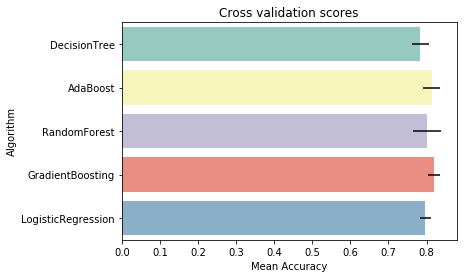

In [21]:
g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

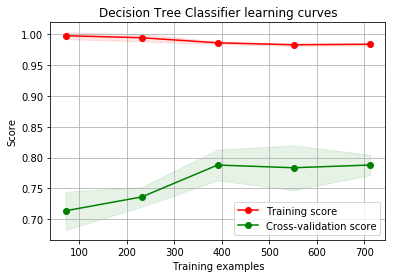

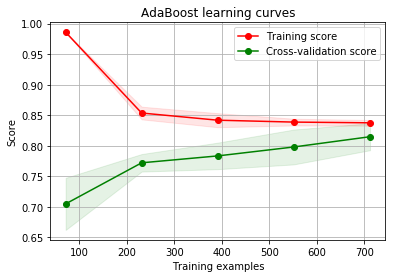

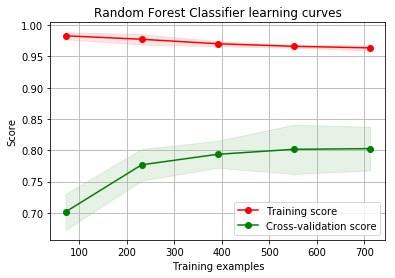

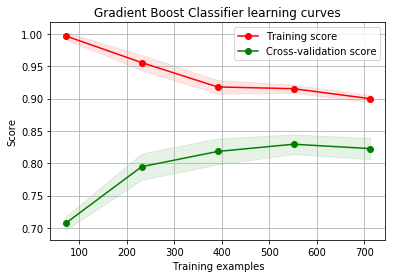

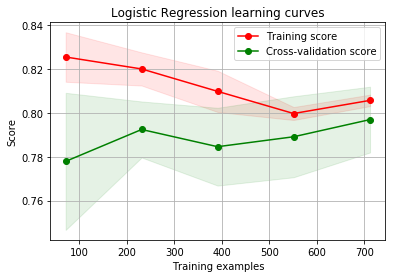

In [22]:

def plot_learning_curve(estimator, title, X, y, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    #Learning curve definition
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    # commands for plotting
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc="best")
    return plt

#Specify which learning curves to plot
g = plot_learning_curve(DTC,"Decision Tree Classifier learning curves",Z_train,Y_train,cv=5)
g = plot_learning_curve(ADAC,"AdaBoost learning curves",Z_train,Y_train,cv=5)
g = plot_learning_curve(RFC,"Random Forest Classifier learning curves",Z_train,Y_train,cv=5)
g = plot_learning_curve(GBC,"Gradient Boost Classifier learning curves",Z_train,Y_train,cv=5)
g = plot_learning_curve(LR,"Logistic Regression learning curves",Z_train,Y_train,cv=5)

## 5. Evaluate Voting Classifier

C:\Users\Anirban\Anaconda3\envs\mldds\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Anirban\Anaconda3\envs\mldds\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


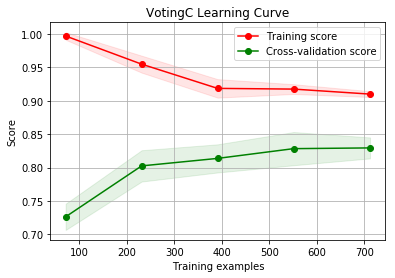

In [23]:
#Calling all models for their opinions
votingC = VotingClassifier(estimators=[('dtc',DTC),('ada', ADAC), ('rfc', RFC), ('gbc',GBC), ('lr',LR)],
                                       voting='hard')
votingC = votingC.fit(Z_train, Y_train)

#Plot curve
g = plot_learning_curve(votingC,"VotingC Learning Curve",Z_train,Y_train,cv=5)

## 6. Predict Survival Rate Using Voting Classifier

In [24]:
#Prediction column determining survival of passengers for test data
Test_Survived = pd.Series(votingC.predict(test), name="Survived")
Test_Survived

0      1
1      0
2      1
3      1
4      0
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     0
22     1
23     1
24     0
25     1
26     0
27     1
28     1
29     1
      ..
388    1
389    1
390    1
391    0
392    1
393    1
394    1
395    1
396    1
397    0
398    1
399    1
400    1
401    1
402    0
403    1
404    1
405    1
406    1
407    1
408    1
409    0
410    1
411    1
412    1
413    1
414    1
415    1
416    1
417    1
Name: Survived, Length: 418, dtype: int32

In [25]:
#Predict Results for passenger survival for test data using voting classifer
VotingC_prediction = pd.DataFrame({'PassengerId': IDtest,
                             'Name': Name,
                            'Survived': Test_Survived})
VotingC_prediction

,PassengerId,Name,Survived
0,892,"Kelly, Mr. James",1
1,893,"Wilkes, Mrs. James (Ellen Needs)",0
2,894,"Myles, Mr. Thomas Francis",1
3,895,"Wirz, Mr. Albert",1
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0
5,897,"Svensson, Mr. Johan Cervin",1
6,898,"Connolly, Miss. Kate",1
7,899,"Caldwell, Mr. Albert Francis",1
8,900,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",1
9,901,"Davies, Mr. John Samuel",1


In [26]:
#Save results of passengers survival by voting classifier to a file
VotingC_prediction.to_csv("VotingC_prediction.csv", index=False)

## 7. Model & Implement Neural Network

In [27]:
#Implementing Deep Learning Model using Neural Network
from keras.models import Sequential
from keras.layers import Dense
import keras.callbacks 
import keras.optimizers
import time

model = Sequential()

#Create Model
batch_size = 40
epochs = 200
model.add(Dense(40, activation="relu", input_dim=7))
model.add(Dense(40, activation="relu"))
model.add(Dense(30, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
#Compile Model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
#Early  Callback
keras.callbacks.EarlyStopping(monitor='val_acc', patience=0)
model.fit(Z_train, Y_train, epochs=epochs, batch_size=batch_size, validation_split=0.3)


Using TensorFlow backend.


Train on 623 samples, validate on 268 samples
Epoch 1/200
623/623 [==============================] - 6s 10ms/step - loss: 0.6690 - acc: 0.6645 - val_loss: 0.6079 - val_acc: 0.7948
Epoch 2/200
623/623 [==============================] - 1s 932us/step - loss: 0.5903 - acc: 0.7929 - val_loss: 0.5283 - val_acc: 0.8209
Epoch 3/200
623/623 [==============================] - 1s 853us/step - loss: 0.5196 - acc: 0.8090 - val_loss: 0.4590 - val_acc: 0.8396
Epoch 4/200
623/623 [==============================] - 1s 821us/step - loss: 0.4684 - acc: 0.8154 - val_loss: 0.4247 - val_acc: 0.8321
Epoch 5/200
623/623 [==============================] - 1s 966us/step - loss: 0.4423 - acc: 0.8202 - val_loss: 0.4127 - val_acc: 0.8284
Epoch 6/200
623/623 [==============================] - 0s 770us/step - loss: 0.4308 - acc: 0.8186 - val_loss: 0.4083 - val_acc: 0.8209
Epoch 7/200
623/623 [==============================] - 0s 569us/step - loss: 0.4263 - acc: 0.8218 - val_loss: 0.4032 - val_acc: 0.8172
Epoch 8/20

Epoch 61/200
623/623 [==============================] - 0s 196us/step - loss: 0.3437 - acc: 0.8571 - val_loss: 0.4218 - val_acc: 0.8209
Epoch 62/200
623/623 [==============================] - 0s 211us/step - loss: 0.3379 - acc: 0.8539 - val_loss: 0.4171 - val_acc: 0.8209
Epoch 63/200
623/623 [==============================] - 0s 186us/step - loss: 0.3370 - acc: 0.8620 - val_loss: 0.4257 - val_acc: 0.8172
Epoch 64/200
623/623 [==============================] - 0s 186us/step - loss: 0.3372 - acc: 0.8587 - val_loss: 0.4287 - val_acc: 0.8134
Epoch 65/200
623/623 [==============================] - 0s 186us/step - loss: 0.3359 - acc: 0.8523 - val_loss: 0.4313 - val_acc: 0.8022
Epoch 66/200
623/623 [==============================] - 0s 196us/step - loss: 0.3427 - acc: 0.8491 - val_loss: 0.4214 - val_acc: 0.8209
Epoch 67/200
623/623 [==============================] - 0s 186us/step - loss: 0.3386 - acc: 0.8555 - val_loss: 0.4196 - val_acc: 0.8134
Epoch 68/200
623/623 [==========================

623/623 [==============================] - 0s 186us/step - loss: 0.2969 - acc: 0.8684 - val_loss: 0.4531 - val_acc: 0.8284
Epoch 122/200
623/623 [==============================] - 0s 161us/step - loss: 0.2967 - acc: 0.8812 - val_loss: 0.4627 - val_acc: 0.8321
Epoch 123/200
623/623 [==============================] - 0s 186us/step - loss: 0.2937 - acc: 0.8796 - val_loss: 0.4550 - val_acc: 0.8284
Epoch 124/200
623/623 [==============================] - 0s 161us/step - loss: 0.2956 - acc: 0.8780 - val_loss: 0.4595 - val_acc: 0.8246
Epoch 125/200
623/623 [==============================] - 0s 161us/step - loss: 0.2996 - acc: 0.8716 - val_loss: 0.4626 - val_acc: 0.8284
Epoch 126/200
623/623 [==============================] - 0s 161us/step - loss: 0.2925 - acc: 0.8764 - val_loss: 0.4661 - val_acc: 0.8358
Epoch 127/200
623/623 [==============================] - 0s 161us/step - loss: 0.2941 - acc: 0.8700 - val_loss: 0.4605 - val_acc: 0.8209
Epoch 128/200
623/623 [==============================] 

Epoch 181/200
623/623 [==============================] - 0s 243us/step - loss: 0.2706 - acc: 0.8844 - val_loss: 0.5039 - val_acc: 0.8284
Epoch 182/200
623/623 [==============================] - 0s 211us/step - loss: 0.2694 - acc: 0.8909 - val_loss: 0.4941 - val_acc: 0.8246
Epoch 183/200
623/623 [==============================] - 0s 186us/step - loss: 0.2702 - acc: 0.8925 - val_loss: 0.5190 - val_acc: 0.8321
Epoch 184/200
623/623 [==============================] - 0s 161us/step - loss: 0.2724 - acc: 0.8812 - val_loss: 0.5038 - val_acc: 0.8284
Epoch 185/200
623/623 [==============================] - 0s 161us/step - loss: 0.2747 - acc: 0.8844 - val_loss: 0.5037 - val_acc: 0.8246
Epoch 186/200
623/623 [==============================] - 0s 161us/step - loss: 0.2685 - acc: 0.8941 - val_loss: 0.5216 - val_acc: 0.8284
Epoch 187/200
623/623 [==============================] - 0s 161us/step - loss: 0.2708 - acc: 0.8812 - val_loss: 0.5054 - val_acc: 0.8284
Epoch 188/200
623/623 [==================

In [28]:
model.evaluate(Z_train,Y_train,batch_size=batch_size)

891/891 [==============================] - 0s 42us/step


[0.3363261651812178, 0.8709315295706427]

In [29]:
#save model
from keras.models import load_model
model.save('nn_model_titanic.h5')
nn_model_titanic=load_model('nn_model_titanic.h5')

In [30]:
for layer in model.layers:
    print(layer.get_config())
    print(layer.get_weights())

{'name': 'dense_1', 'trainable': True, 'batch_input_shape': (None, 7), 'dtype': 'float32', 'units': 40, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}
[array([[ 0.02573937,  0.35954982,  0.14119594, -0.10323659, -0.11426928,
        -0.13450827, -0.22478221, -0.0958878 , -0.0183264 ,  0.30768794,
        -0.24806552,  0.39455715,  0.39682716, -0.0299616 , -0.25533184,
         0.17377967, -0.29708794, -0.21462904, -0.4739464 , -0.19367966,
        -0.47891134,  0.44207117, -0.412274  ,  0.25958657, -0.01640726,
         0.29026434,  0.01130267, -0.32925665,  0.23283276,  0.09346513,
        -0.5036308 , -0.5079272 ,  0.1314726 ,  0.23669504,  0.44044557,
      

## 8. Evaluate Neural Network

In [31]:
#Deep learning predictions
predictions = model.predict(Test, batch_size=40)
predictions = [0 if pred<0.5 else 1 for pred in predictions ]
print(predictions)

[0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 

## 9. Predict Survival Rate Using Neural Network

In [32]:
NNPrediction = pd.DataFrame({'PassengerId': IDtest,
                             'Name': Name,
                            'Survived': predictions})
NNPrediction

,PassengerId,Name,Survived
0,892,"Kelly, Mr. James",0
1,893,"Wilkes, Mrs. James (Ellen Needs)",0
2,894,"Myles, Mr. Thomas Francis",0
3,895,"Wirz, Mr. Albert",0
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0
5,897,"Svensson, Mr. Johan Cervin",0
6,898,"Connolly, Miss. Kate",1
7,899,"Caldwell, Mr. Albert Francis",0
8,900,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",1
9,901,"Davies, Mr. John Samuel",0


In [33]:
#Save results of passengers survival by neural network to a file
NNPrediction.to_csv("NNPrediction.csv", index=False)

## 10. Conclusions
1. The variables in datasets have weak correlation with one another.
   This is probably one reason why the models had a difficult time understanding the factors that
   determined survival rate or not.
2. Detailed exploratory data analysis is needed with colorful, informative visuals explaining clearly the factors
   influencing survival of a passenger. If neccesssary, create new features with analytical transformations
   that can give stronger correlation coeffients with one another.
3. Spend more time fine tuning hyperparameters of the machine learning ensemble models.
4. Focus on improving validation accuracy scores than training accuracy. We want the models to predict correct unknown outcomes
   after all rather than blindly memorising training data.
4. Deep learning models generally give more accurate and precise outcomes compared to machine learning models.